In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\CODING\BITS Pilani Mtech AI ML Sem 1\ML\Assignment 2\wdbc.data", header=None)

# Basic dataset info
print("Dataset Shape (rows, columns):", data.shape)
print("\nFirst 5 rows:")
print(data.head())

# Check number of instances
num_instances = data.shape[0]

# Check number of features (excluding ID and target)
num_features = data.shape[1] - 2

print("\nNumber of instances:", num_instances)
print("Number of features:", num_features)

# Check target classes
print("\nTarget class distribution:")
print(data[1].value_counts())

<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Anannya\AppData\Local\Temp\ipykernel_13468\3032193701.py:4: SyntaxWarning: invalid escape sequence '\C'
  data = pd.read_csv("C:\CODING\BITS Pilani Mtech AI ML Sem 1\ML\Assignment 2\wdbc.data", header=None)


Dataset Shape (rows, columns): (569, 32)

First 5 rows:
         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30   

Data Preprocessing

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# 1. Drop ID column
data = data.drop(columns=[0])


# 2. Separate features and target
X = data.drop(columns=[1])   # Features
y = data[1]                  # Target

# 3. Encode target labels
# B -> 0, M -> 1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


# 4. Check for missing values
print("Missing values per column:")
print(X.isnull().sum().sum())


# 5. Train-Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# 6. Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Final shapes
print("\nTraining set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)


Missing values per column:
0

Training set shape: (455, 30)
Testing set shape: (114, 30)


EDA

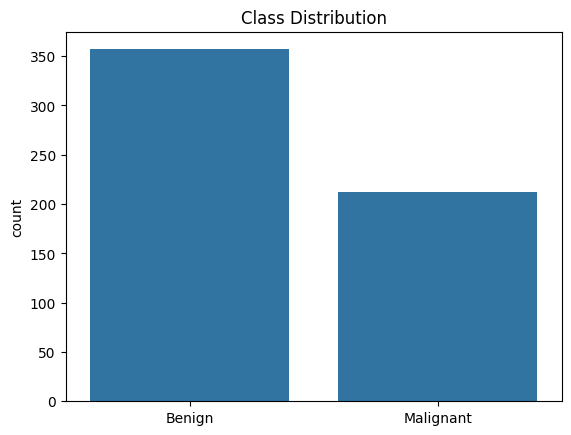

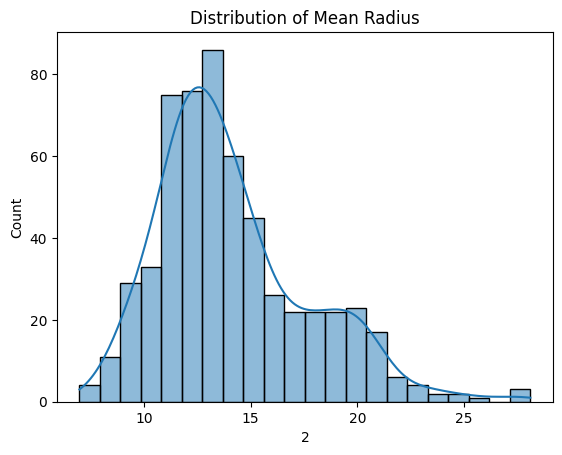

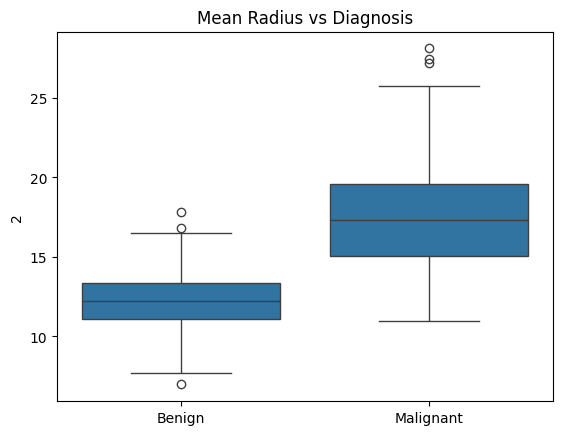

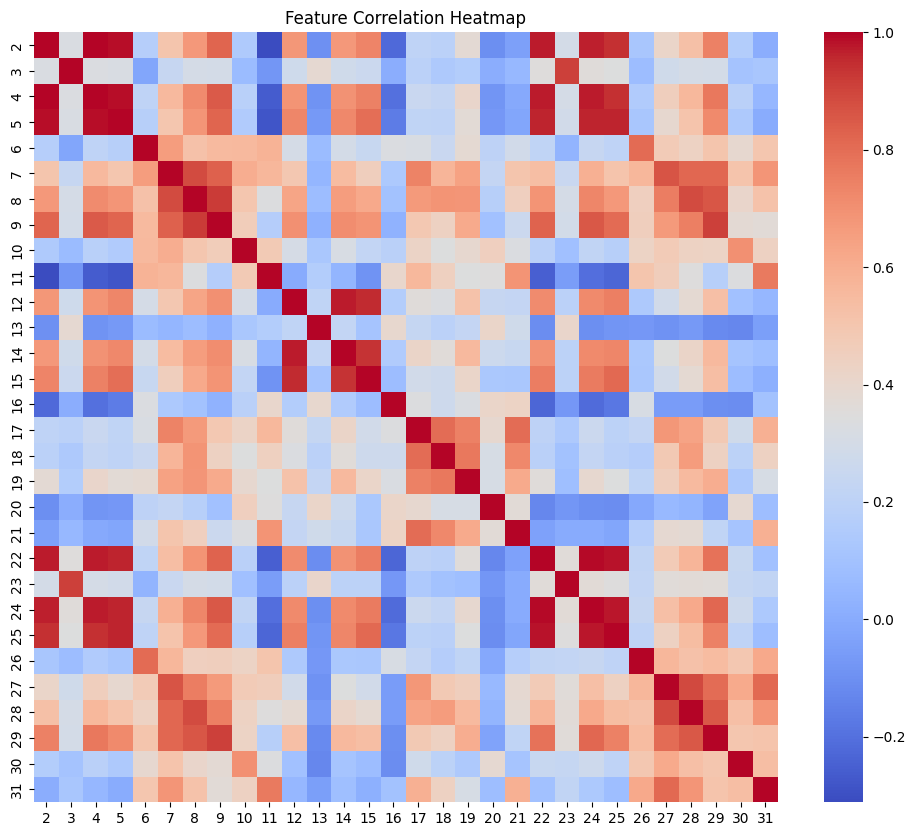

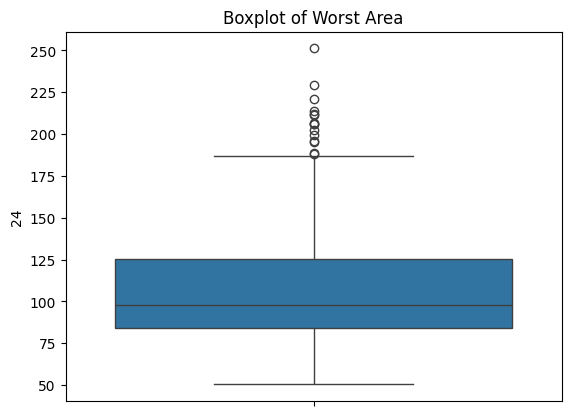

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
sns.countplot(x=y)
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.title("Class Distribution")
plt.show()

#Distribution of mean radius

sns.histplot(X.iloc[:, 0], kde=True)
plt.title("Distribution of Mean Radius")
plt.show()

#Feature vs Target Relationship

sns.boxplot(x=y, y=X.iloc[:, 0])
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.title("Mean Radius vs Diagnosis")
plt.show()

#Correlation Analysis 
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

#Outlier detection
sns.boxplot(y=X.iloc[:, 22])
plt.title("Boxplot of Worst Area")
plt.show()


In [4]:
X.describe()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Model Building

In [5]:
#DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

Evaluation Metrics

In [7]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report
)

# 1. Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# 2. AUC Score
auc_dt = roc_auc_score(y_test, y_prob_dt)

# 3. Precision
precision_dt = precision_score(y_test, y_pred_dt)

# 4. Recall
recall_dt = recall_score(y_test, y_pred_dt)

# 5. F1 Score
f1_dt = f1_score(y_test, y_pred_dt)

# 6. Matthews Correlation Coefficient (MCC)
mcc_dt = matthews_corrcoef(y_test, y_pred_dt)

# Print Results
print("Decision Tree Evaluation Metrics")
print("---------------------------------")
print(f"Accuracy  : {accuracy_dt:.4f}")
print(f"AUC Score : {auc_dt:.4f}")
print(f"Precision : {precision_dt:.4f}")
print(f"Recall    : {recall_dt:.4f}")
print(f"F1 Score  : {f1_dt:.4f}")
print(f"MCC Score : {mcc_dt:.4f}")


Decision Tree Evaluation Metrics
---------------------------------
Accuracy  : 0.9298
AUC Score : 0.9246
Precision : 0.9048
Recall    : 0.9048
F1 Score  : 0.9048
MCC Score : 0.8492
